In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [18]:
# Path ke direktori dataset
data_dir = 'dataset_1'

# Parameter model
batch_size = 64
image_height = 150
image_width = 150
num_classes = 3  # Jumlah kelas (A, B, C)

In [19]:
# Pra-pemrosesan gambar dan augmentasi
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,      # Normalisasi nilai pixel
    rotation_range=20,      # Putar gambar secara acak
    width_shift_range=0.2,  # Geser gambar secara horizontal
    height_shift_range=0.2, # Geser gambar secara vertikal
    shear_range=0.2,        # Peregangan acak
    zoom_range=0.2,         # Zoom acak
    horizontal_flip=True,   # Flip gambar secara horizontal
    fill_mode='nearest',    # Isi piksel yang hilang
    validation_split=0.2    # Pemisahan data validasi 10%
)

In [20]:
# Memuat dataset
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'     
)

Found 241 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [21]:
# Membangun model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Pencegah overfitting
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [22]:
# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
num_epochs = 20
history = model.fit(train_data, epochs=num_epochs, validation_data=val_data)

Epoch 1/20
4/4 [==============================] - 3s 766ms/step - loss: 1.5478 - accuracy: 0.3112 - val_loss: 1.1176 - val_accuracy: 0.3333
Epoch 2/20
4/4 [==============================] - 3s 608ms/step - loss: 1.1260 - accuracy: 0.3361 - val_loss: 1.0878 - val_accuracy: 0.5167
Epoch 3/20
4/4 [==============================] - 3s 607ms/step - loss: 1.0784 - accuracy: 0.4647 - val_loss: 1.0435 - val_accuracy: 0.6333
Epoch 4/20
4/4 [==============================] - 3s 614ms/step - loss: 1.0084 - accuracy: 0.5519 - val_loss: 0.8973 - val_accuracy: 0.6500
Epoch 5/20
4/4 [==============================] - 3s 652ms/step - loss: 0.8380 - accuracy: 0.6846 - val_loss: 0.9826 - val_accuracy: 0.3667
Epoch 6/20
4/4 [==============================] - 2s 592ms/step - loss: 0.7974 - accuracy: 0.6224 - val_loss: 0.6404 - val_accuracy: 0.7333
Epoch 7/20
4/4 [==============================] - 3s 611ms/step - loss: 0.6589 - accuracy: 0.7012 - val_loss: 0.5310 - val_accuracy: 0.8333
Epoch 8/20
4/4 [====

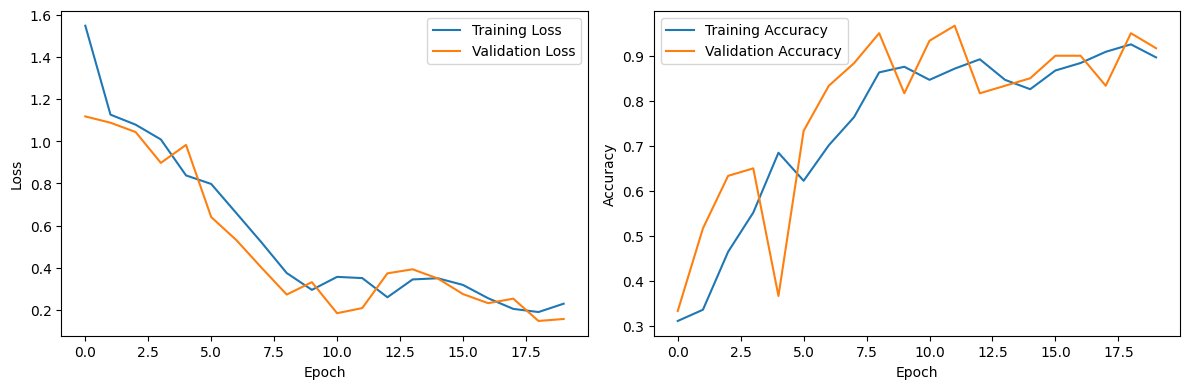

In [23]:
# Visualisasi loss dan accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 277ms/step - loss: 0.1744 - accuracy: 0.8833
Validation Loss: 0.1743502914905548
Validation Accuracy: 0.8833333253860474
2/2 [==============================] - 0s 51ms/step


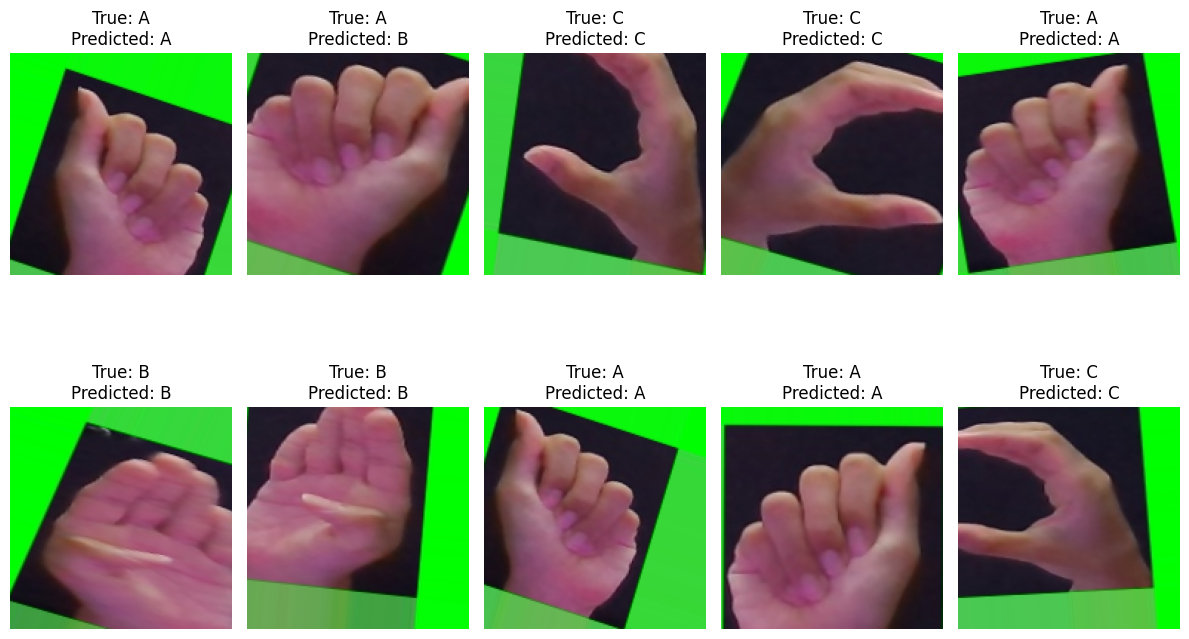

In [24]:
# Path ke folder data
data_dir = 'ABC'  # Ubah sesuai dengan path Anda
classes = sorted(os.listdir(data_dir))

# Evaluasi model pada data validasi
eval_result = model.evaluate(val_data)
print("Validation Loss:", eval_result[0])
print("Validation Accuracy:", eval_result[1])

# Prediksi data uji
sample_images, sample_labels = next(val_data)
predictions = model.predict(sample_images)

# Ubah one-hot encoding ke label numerik
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(sample_labels, axis=1)

# Plot beberapa contoh gambar dengan label prediksi dan sebenarnya
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {classes[true_labels[i]]}\nPredicted: {classes[predicted_labels[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [25]:
# Save the model
model.save('model/ABC_model.keras')

In [50]:
# Load the model
loaded_model = tf.keras.models.load_model('model/ABC_model.keras')